# Examining conditions that lead to low vs high accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing (Skip After Running It Initially)

In [ ]:
import pandas as pd

selected_1600_images_info_path = '/content/drive/My Drive/Webcam_Project/datasets/selected_1600_images/selected_1600_images_info.csv'

selected_1600_images_info_df = pd.read_csv(selected_1600_images_info_path)
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg


In [ ]:
selected_1600_images_info_df['matched'] = selected_1600_images_info_df['precipitation_category'] == selected_1600_images_info_df['prediction_category']

In [ ]:
selected_1600_images_info_df['station'] = selected_1600_images_info_df['filename'].apply(lambda x: x.split('-')[0])
selected_1600_images_info_df['direction'] = selected_1600_images_info_df['filename'].apply(lambda x: x.split('-')[1])
selected_1600_images_info_df['strtime'] = selected_1600_images_info_df['filename'].apply(lambda x: x.split('-')[2] + '-' + x.split('-')[3].split('.')[0])
selected_1600_images_info_df['datetime'] = pd.to_datetime(selected_1600_images_info_df['strtime'], format='%Y_%m_%d-%H_%M_%S')
selected_1600_images_info_df.drop('strtime', axis=1, inplace=True)

In [ ]:
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30


In [ ]:
station_info_df = pd.read_excel(f"/content/drive/My Drive/Webcam_Project/METAR/navcan_cameras_to_archive.xlsx", engine='openpyxl')
station_info_df.head()

,IATA_ID,direction,source,Climate_ID,Station_ID,WMO_ID,TC_ID,MSC_ID,AUTO/MAN,Name,Latitude,Longitude,Elevation(m),Data_Provider,Province/Territory,First Year,Last Year
0,CWWQ,N,navCan2,1195251,52158,NaN,WWQ,1195251,MAN,Muncho Lake,59.01670,-125.76700,836.5,NAV CANADA,British Columbia,2014,2022
1,CYAB,SE,navCan2,2400401,50497,NaN,YAB,2400401,MAN,Arctic Bay,73.00639,-85.04732,21.9,NAV CANADA,Nunavut,2012,2022
2,CYBD,SW,navCan2,1060848,52978,NaN,YBD,1060845,MAN,Bella Coola,52.38763,-126.59577,35.7,NAV CANADA,British Columbia,2014,2022
3,CYBV,W,navCan2,5030204,53318,NaN,YBV,5030201,MAN,Berens River,52.35889,-97.01794,222.2,NAV CANADA,Manitoba,2015,2022
4,CYCY,N,navCan2,2400804,51077,71090.0,YCY,2400803,MAN,Clyde River,70.48592,-68.51694,26.5,NAV CANADA,Nunavut,2013,2022


In [ ]:
station_to_info_map = {}

for index, row in station_info_df.iterrows():
    station_to_info_map[row['IATA_ID']] = row

In [ ]:
selected_1600_images_info_df['latitude'] = selected_1600_images_info_df['station'].apply(lambda x: station_to_info_map[x]['Latitude'])
selected_1600_images_info_df['longitude'] = selected_1600_images_info_df['station'].apply(lambda x: station_to_info_map[x]['Longitude'])
selected_1600_images_info_df['elevation'] = selected_1600_images_info_df['station'].apply(lambda x: station_to_info_map[x]['Elevation(m)'])
selected_1600_images_info_df['province'] = selected_1600_images_info_df['station'].apply(lambda x: station_to_info_map[x]['Province/Territory'])
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime,latitude,longitude,elevation,province
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30,58.62158,-117.16467,338.0,Alberta
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30,49.63028,-112.79972,929.0,Alberta
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30,52.18229,-113.89448,904.6,Alberta
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30,54.14385,-115.78677,782.4,Alberta
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30,54.14385,-115.78677,782.4,Alberta


In [ ]:
!pip install astral

In [ ]:
from astral.sun import sun
from astral import LocationInfo
from datetime import datetime
import pandas as pd

def calculate_sun_times(row):
    try:
        location = LocationInfo(latitude=row['latitude'], longitude=row['longitude'])
        s = sun(location.observer, date=datetime.now())
        sunrise = s['sunrise']
        sunset = s['sunset']
    except Exception as e:
        sunrise = None
        sunset = None
        print(f"Error calculating for {row['latitude']}, {row['longitude']}: {str(e)}")

    return pd.Series({'sunrise': sunrise, 'sunset': sunset})

In [ ]:
# Apply the function to the DataFrame and assign the result to new columns
selected_1600_images_info_df[['sunrise', 'sunset']] = selected_1600_images_info_df.apply(calculate_sun_times, axis=1)
selected_1600_images_info_df['sunrise'] = selected_1600_images_info_df['sunrise'].apply(lambda x: x.tz_localize(None) if pd.notnull(x) else None)
selected_1600_images_info_df['sunset'] = selected_1600_images_info_df['sunset'].apply(lambda x: x.tz_localize(None) if pd.notnull(x) else None)
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime,latitude,longitude,elevation,province,sunrise,sunset
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30,58.62158,-117.16467,338.0,Alberta,2024-03-28 13:25:37.070789,2024-03-28 02:20:22.245270
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30,49.63028,-112.79972,929.0,Alberta,2024-03-28 13:15:33.466575,2024-03-28 01:55:50.639744
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30,52.18229,-113.89448,904.6,Alberta,2024-03-28 13:18:09.748341,2024-03-28 02:01:54.949607
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999


We'll categorize the time of day into "Night", "Morning", "Afternoon", and "Evening" for simplicity. The categories will be determined as follows:

Morning: From sunrise to noon
Afternoon: From noon to sunset
Evening: From sunset to midnight
Night: All other times
For cases with no sunrise or sunset, we'll categorize as either "Polar Night" or "Polar Day" based on the datetime value, assuming that if datetime is during typical daylight hours (e.g., 10:00 to 22:00) and there's no sunrise/sunset, it's a polar day, and vice versa for polar night.

In [ ]:
import pandas as pd
from datetime import datetime, time

def categorize_time_of_day(row):
    # Handle polar day/night by checking if sunrise/sunset is None
    if pd.isnull(row['sunrise']) or pd.isnull(row['sunset']):
        # Assuming polar day between 10:00 and 22:00, else polar night
        if time(10, 0) <= row['datetime'].time() <= time(22, 0):
            return 'Polar Day'
        else:
            return 'Polar Night'

    # For normal days with sunrise and sunset
    if row['sunrise'] <= row['datetime'] < row['datetime'].replace(hour=12, minute=0, second=0):
        return 'Morning'
    elif row['datetime'].replace(hour=12, minute=0, second=0) <= row['datetime'] < row['sunset']:
        return 'Afternoon'
    elif row['sunset'] <= row['datetime'] < row['datetime'].replace(hour=23, minute=59, second=59):
        return 'Evening'
    else:
        return 'Night'

In [ ]:
# Apply the function to create the new column
selected_1600_images_info_df['time_of_day'] = selected_1600_images_info_df.apply(categorize_time_of_day, axis=1)
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime,latitude,longitude,elevation,province,sunrise,sunset,time_of_day
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30,58.62158,-117.16467,338.0,Alberta,2024-03-28 13:25:37.070789,2024-03-28 02:20:22.245270,Afternoon
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30,49.63028,-112.79972,929.0,Alberta,2024-03-28 13:15:33.466575,2024-03-28 01:55:50.639744,Night
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30,52.18229,-113.89448,904.6,Alberta,2024-03-28 13:18:09.748341,2024-03-28 02:01:54.949607,Afternoon
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon


In [ ]:
month_abbr = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
selected_1600_images_info_df['month'] = selected_1600_images_info_df['datetime'].dt.month.apply(lambda x: month_abbr[x-1])
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime,latitude,longitude,elevation,province,sunrise,sunset,time_of_day,month
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30,58.62158,-117.16467,338.0,Alberta,2024-03-28 13:25:37.070789,2024-03-28 02:20:22.245270,Afternoon,MAR
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30,49.63028,-112.79972,929.0,Alberta,2024-03-28 13:15:33.466575,2024-03-28 01:55:50.639744,Night,MAR
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30,52.18229,-113.89448,904.6,Alberta,2024-03-28 13:18:09.748341,2024-03-28 02:01:54.949607,Afternoon,MAR
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon,MAR
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon,MAR


In [ ]:
import pandas as pd
from datetime import datetime, time

def categorize_tmpc(row):
    tmpc = row['tmpc']
    if tmpc <= -1:
        return '<=-1'
    elif tmpc >= 3:
        return '>=3'
    else:
        return '-1~3'

In [ ]:
# Apply the function to create the new column
selected_1600_images_info_df['tmpc_range'] = selected_1600_images_info_df.apply(categorize_tmpc, axis=1)
selected_1600_images_info_df.head()

,tmpc,precipitation_category,prediction_category,filename,matched,station,direction,datetime,latitude,longitude,elevation,province,sunrise,sunset,time_of_day,month,tmpc_range
0,-16.0,SNOW_ONLY,SNOW_ONLY,CYOJ-NE-2023_03_15-17_04_30.jpg,True,CYOJ,NE,2023-03-15 17:04:30,58.62158,-117.16467,338.0,Alberta,2024-03-28 13:25:37.070789,2024-03-28 02:20:22.245270,Afternoon,MAR,<=-1
1,0.0,MISSING,MISSING,CYQL-SW-2023_03_17-01_04_30.jpg,True,CYQL,SW,2023-03-17 01:04:30,49.63028,-112.79972,929.0,Alberta,2024-03-28 13:15:33.466575,2024-03-28 01:55:50.639744,Night,MAR,-1~3
2,1.0,MISSING,MISSING,CYQF-W-2023_03_19-21_04_30.jpg,True,CYQF,W,2023-03-19 21:04:30,52.18229,-113.89448,904.6,Alberta,2024-03-28 13:18:09.748341,2024-03-28 02:01:54.949607,Afternoon,MAR,-1~3
3,-7.0,MISSING,MISSING,CYZU-SE-2023_03_21-16_04_30.jpg,True,CYZU,SE,2023-03-21 16:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon,MAR,<=-1
4,0.0,MISSING,MISSING,CYZU-SE-2023_03_22-18_04_30.jpg,True,CYZU,SE,2023-03-22 18:04:30,54.14385,-115.78677,782.4,Alberta,2024-03-28 13:24:12.470131,2024-03-28 02:10:56.300999,Afternoon,MAR,-1~3


In [ ]:
selected_1600_images_info_df.to_csv('selected_1600_images_info_expanded.csv', index=False)

In [ ]:
from google.colab import files
files.download('./selected_1600_images_info_expanded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Analysis

> Target Variates

- precipitation_category
- station
- direction
- elevation
- province
- time_of_day
- month
- tmpc_range

In [ ]:
selected_1600_images_info_df.columns

Index(['tmpc', 'precipitation_category', 'prediction_category', 'filename',
       'matched', 'station', 'direction', 'datetime', 'latitude', 'longitude',
       'elevation', 'province', 'sunrise', 'sunset', 'time_of_day', 'month',
       'tmpc_range'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_success_rate(df, source_column, target_column, min_height=5):
    # Compute the success rate
    success_rates = df.groupby(source_column)[target_column].mean().sort_values(ascending=False)

    # Ensure the graph has at least the minimum height
    calculated_height = max(min_height, len(success_rates) / 2)

    # Plotting
    plt.figure(figsize=(10, calculated_height))  # Use max of calculated height and minimum height
    success_rates.plot(kind='bar')
    plt.title('Success Rate by Unique Value')
    plt.xlabel(source_column)
    plt.ylabel('Success Rate')

    # Adding the success rate labels
    for index, value in enumerate(success_rates):
        plt.text(index, value, f"{value:.2%}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

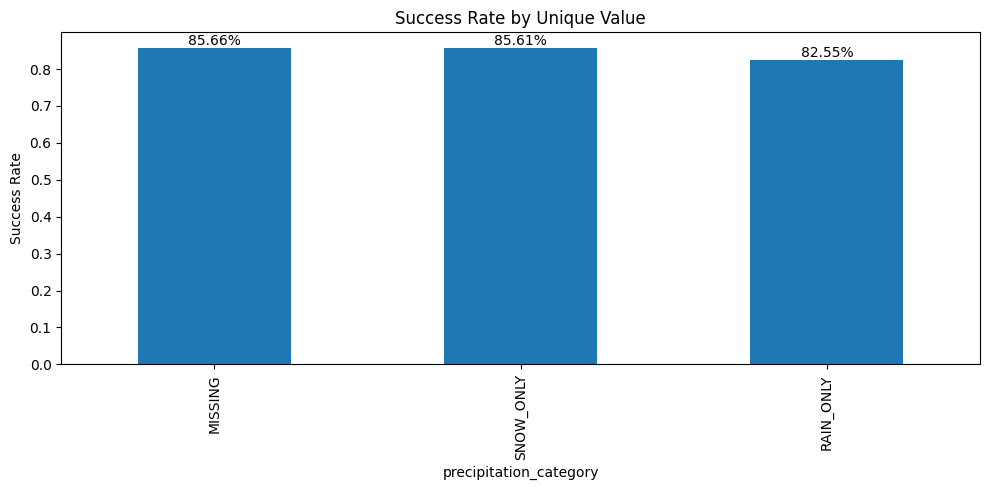

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'precipitation_category', 'matched')

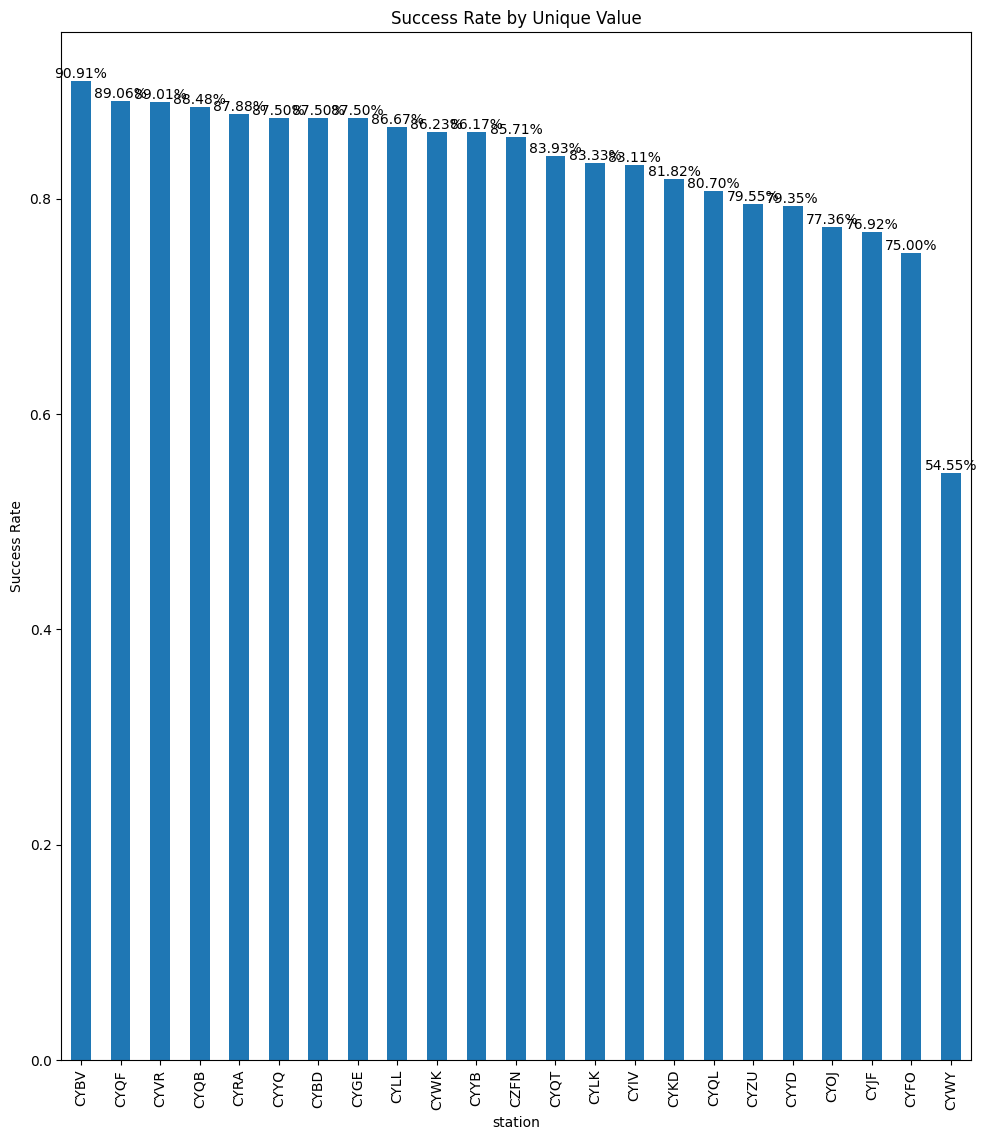

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'station', 'matched')

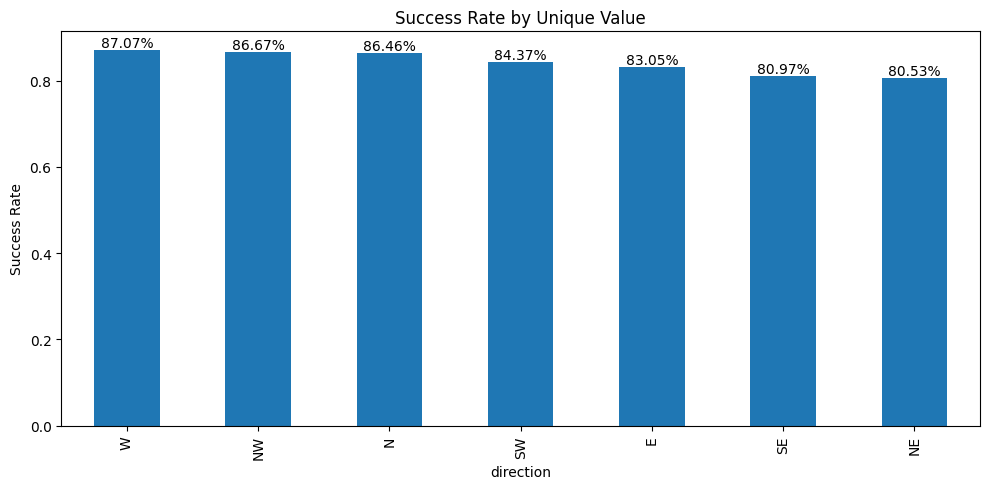

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'direction', 'matched')

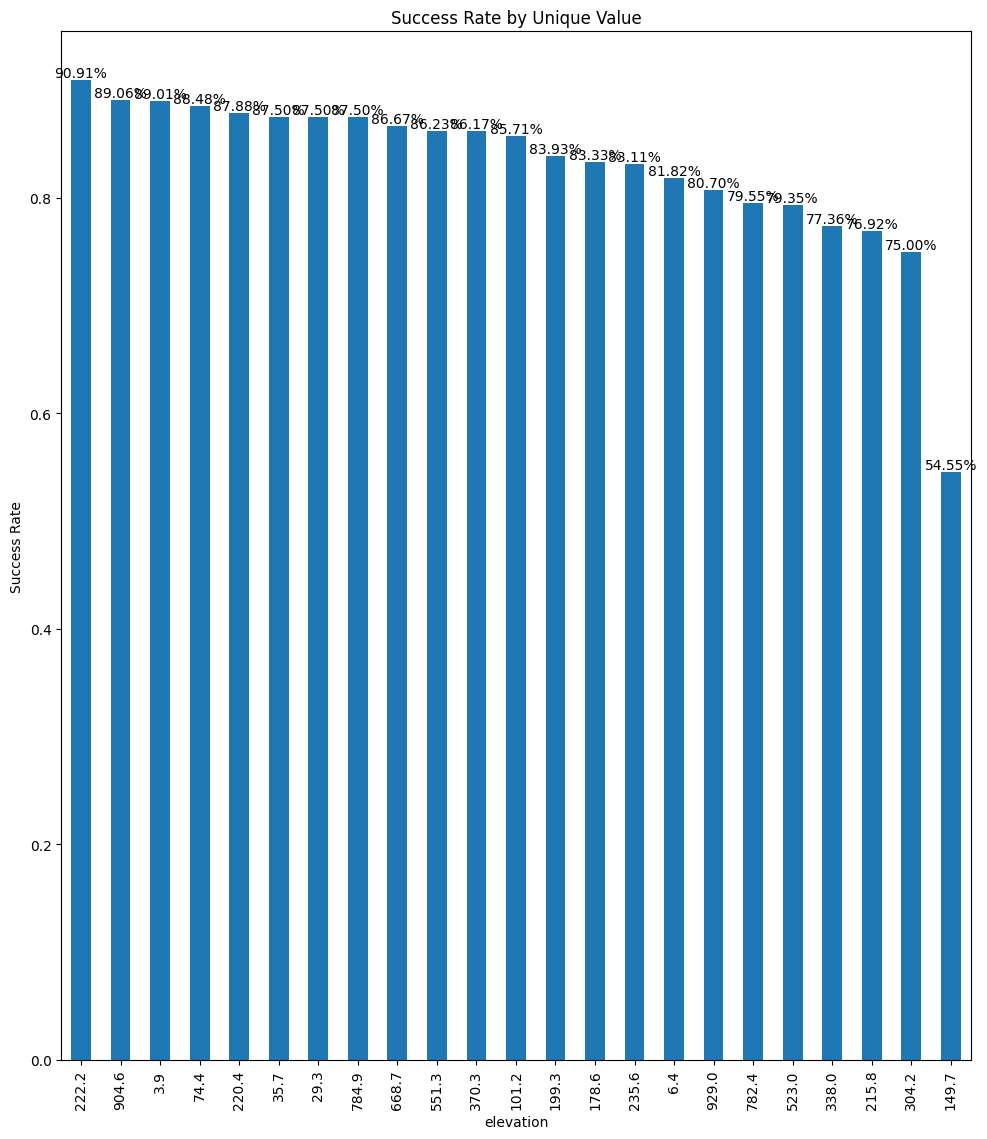

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'elevation', 'matched')

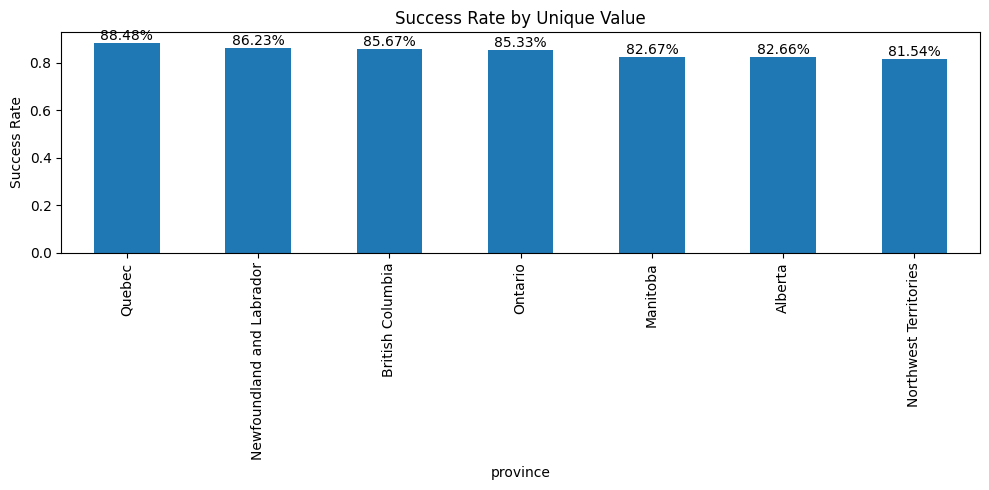

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'province', 'matched')

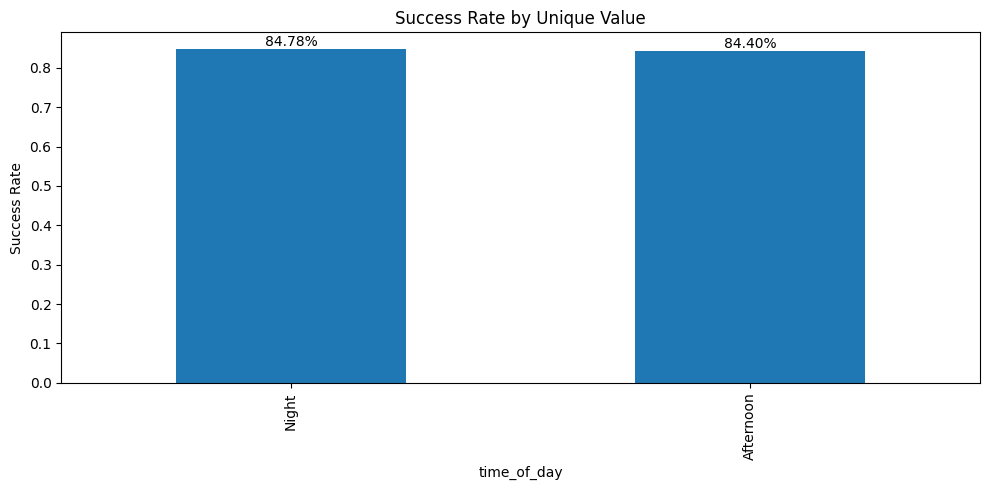

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'time_of_day', 'matched')

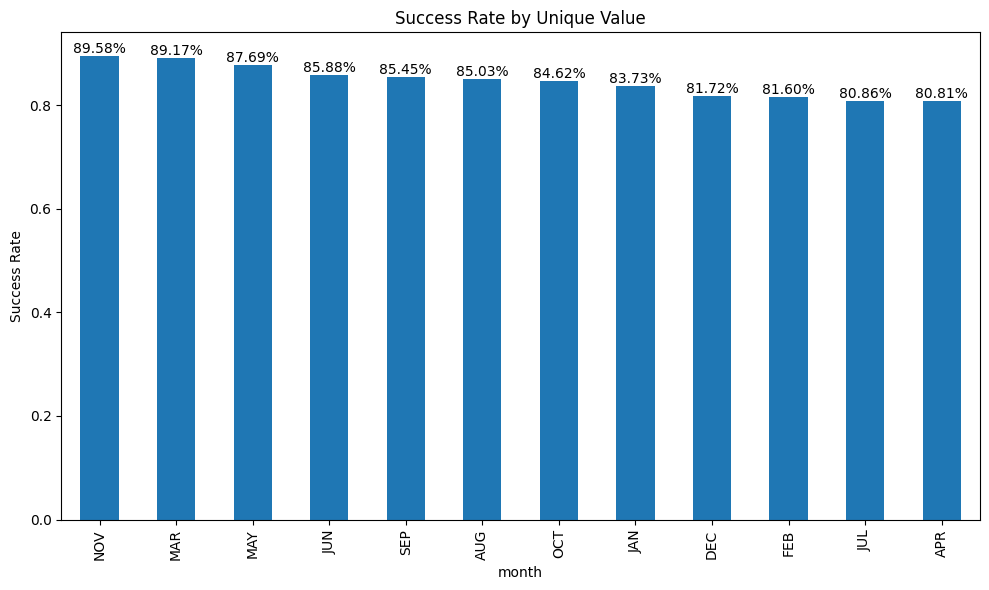

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'month', 'matched')

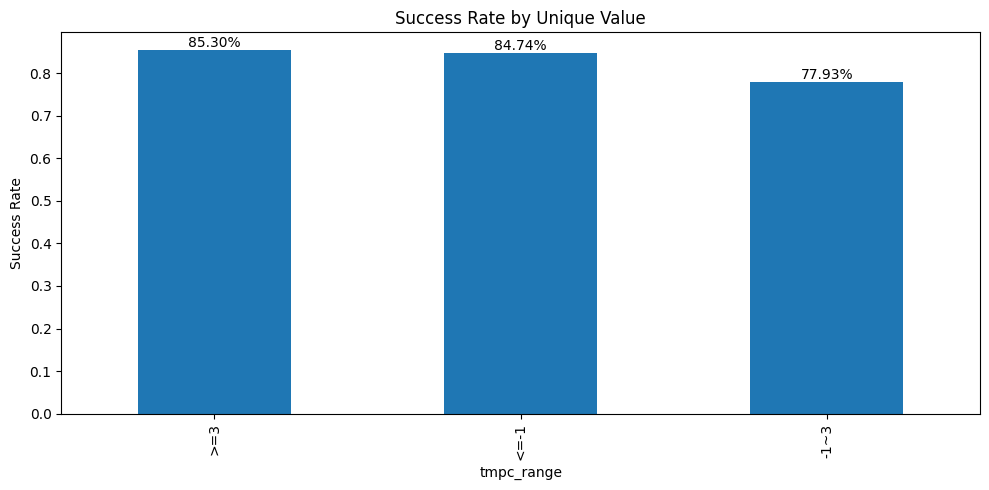

In [ ]:
plot_success_rate(selected_1600_images_info_df, 'tmpc_range', 'matched')